In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

import matplotlib as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import nltk
import seaborn as sns
from nltk.corpus import stopwords

C:\Users\Alex\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Alex\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('Новая выгрузка обр.csv', encoding="cp1251")
df = df.drop(['Адресат'], axis = 1)
df

,Автор,Место работы автора,Специализация адресата,Содержание,Примечание
0,Антонова С.В.,АО «Интерфакс»,Генеральный директор,возможн использован сетев издан информацион ре...,
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Генеральный директор,участ совещан вопрос доработк фэ предоставлен ...,
2,Цивилев С.Е.,Администрация Кемеровской области,Генеральный директор,командирован саликов к. глушк д. участ заседан...,
3,Волков Г.А.,Министерство транспорта Российской Федерации,Административный директор,участ чемпионат мир профессиональн мастерств с...,
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Генеральный директор,участ церемон открыт вузовск чемпионат 15 апр ...,
...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Генеральный директор,присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Генеральный директор,заседан рабоч групп приоритетн проект рабоч ка...,
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Генеральный директор,протокол заседан президиум совет президент рф ...,
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Генеральный директор,проведен 21.11.2017 заседан организацион комит...,


In [3]:
df['Количество слов'] = df['Содержание'].apply(lambda x: len(str(x).split(' ')))

In [4]:
df

,Автор,Место работы автора,Специализация адресата,Содержание,Примечание,Количество слов
0,Антонова С.В.,АО «Интерфакс»,Генеральный директор,возможн использован сетев издан информацион ре...,,9
1,Картошкин С.А.,Министерство просвещения Российской Федерации,Генеральный директор,участ совещан вопрос доработк фэ предоставлен ...,,15
2,Цивилев С.Е.,Администрация Кемеровской области,Генеральный директор,командирован саликов к. глушк д. участ заседан...,,16
3,Волков Г.А.,Министерство транспорта Российской Федерации,Административный директор,участ чемпионат мир профессиональн мастерств с...,,10
4,Атанов И.В.,Ставропольский государственный аграрный универ...,Генеральный директор,участ церемон открыт вузовск чемпионат 15 апр ...,,11
...,...,...,...,...,...,...
4887,Запруднова Е.В.,Администрация Владимирской области,Генеральный директор,присутств школьник миров чемпионат казан предп...,переда митькин а. т.к. ответ е письм,6
4888,Черноскутова И.А.,Министерство образования и науки Российской Фе...,Генеральный директор,заседан рабоч групп приоритетн проект рабоч ка...,,9
4889,Медведев Д.А.,Аппарат Правительства Российской Федерации,Генеральный директор,протокол заседан президиум совет президент рф ...,,10
4890,Синюгина Т.Ю.,Министерство образования и науки РФ. Заместите...,Генеральный директор,проведен 21.11.2017 заседан организацион комит...,,20


In [5]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import lightgbm

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [6]:
#cat_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
encoder = preprocessing.LabelEncoder()
#for col in cat_columns:
#    df[col] = encoder.fit_transform(df[col])
df['Автор'] = encoder.fit_transform(df['Автор'])
df['Место работы автора'] = encoder.fit_transform(df['Место работы автора'])
df['Специализация адресата'] = encoder.fit_transform(df['Специализация адресата'])
df['Содержание'] = encoder.fit_transform(df['Содержание'])
df['Примечание'] = encoder.fit_transform(df['Примечание'])

In [7]:
df

,Автор,Место работы автора,Специализация адресата,Содержание,Примечание,Количество слов
0,74,110,5,240,0,9
1,651,829,5,3514,0,15
2,1646,152,5,758,0,16
3,274,844,1,3714,0,10
4,99,1256,5,3675,0,11
...,...,...,...,...,...,...
4887,540,143,5,2268,132,6
4888,1675,793,5,585,0,9
4889,963,205,5,2563,0,10
4890,1387,772,5,2273,0,20


In [8]:
from sklearn.model_selection import train_test_split
X = df[['Автор','Место работы автора','Содержание','Количество слов', 'Примечание']]
y = df["Специализация адресата"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1, stratify = df["Специализация адресата"])

In [20]:
x_test

,Автор,Место работы автора,Содержание,Количество слов,Примечание
2692,1721,747,1546,10,0
1309,1194,178,3498,16,0
3344,1410,896,3295,19,0
1542,1036,1350,549,4,0
3898,1062,526,2318,6,0
...,...,...,...,...,...
3900,575,442,25,8,0
96,1708,293,1986,7,0
3577,1768,1172,1494,8,0
2225,1223,780,2288,5,0


In [9]:
from xgboost import XGBClassifier, plot_importance, plot_tree
import sklearn
from sklearn.metrics import classification_report
xgb_cls = XGBClassifier(n_estimators = 20000, learning_rate = 0.2, n_jobs = -1, random_state = 42)
xgb_cls.fit(x_train, y_train)
y_pred = xgb_cls.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Alex\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      0.48      0.49       239
           2       0.58      0.39      0.47        38
           3       0.64      0.49      0.55       101
           4       0.60      0.47      0.53        76
           5       0.66      0.71      0.68       479
           6       0.52      0.55      0.53        42
           7       0.38      0.19      0.26        26
           8       0.60      0.45      0.51        20
           9       0.21      0.15      0.17        75
          10       0.69      0.79      0.74       509
          11       1.00      0.25      0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

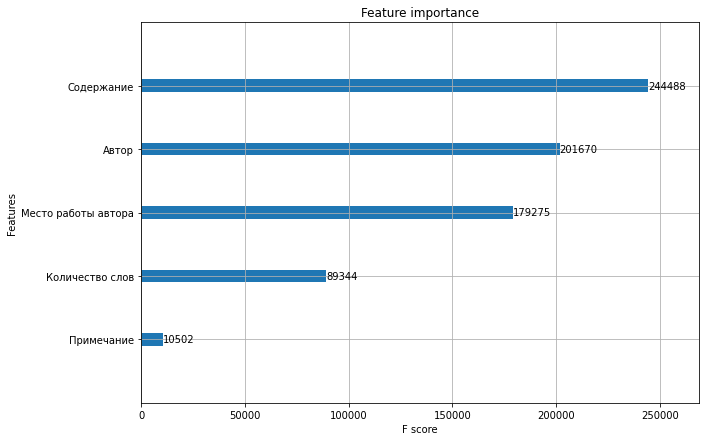

In [10]:
plt.rcParams["figure.figsize"] = (10,7)
plot_importance(xgb_cls)

In [17]:
import pickle
filename = 'MODELXG.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('MODELXG.sav', 'rb'))
y_pred = loaded_model.predict(X_test)
X_test

In [11]:
df.to_csv('Выгрузка для модели.csv', encoding='cp1251' , index=False)

In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [13]:
y_pred = classifier.predict(x_test)
y_pred

array([10, 10,  5, ...,  3, 10,  5])

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[  0   0   0   0   0   2   0   0   0   0   4   0]
 [  0 104   2   2   9  45   4   0   1   5  67   0]
 [  0   7   9   1   0   7   0   0   0   3  11   0]
 [  0  10   0  35   1  16   2   0   0   5  32   0]
 [  0   7   0   0  33  13   1   0   1   0  21   0]
 [  0  29   1   4   9 331   4   2   1   6  92   0]
 [  0   7   0   1   3   8  17   0   0   0   6   0]
 [  0   4   0   0   2   5   0   3   0   1  11   0]
 [  0   1   0   0   0   6   2   0   9   1   1   0]
 [  0  12   1   4   6  29   1   0   0   3  19   0]
 [  0  23   0   5   6  60   3   1   1   4 406   0]
 [  0   0   0   0   0   1   0   0   0   0   3   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.51      0.44      0.47       239
           2       0.69      0.24      0.35        38
           3       0.67      0.35      0.46       101
           4       0.48      0.43      0.46        76
           5       0.63      0.69      0.66       479
        

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)
print(confusion_matrix(y_test,model.predict(x_test)))
print(classification_report(y_test,model.predict(x_test)))
print(accuracy_score(y_test, model.predict(x_test)))

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[  0   0   0   0   0   3   0   0   0   0   3   0]
 [  0   0   1   0   2  61   0   0   0   0 175   0]
 [  0   0   4   0   0  13   0   0   0   0  21   0]
 [  0   0   3   0   0  22   0   0   0   0  76   0]
 [  0   0   0   0   1   9   0   0   0   0  66   0]
 [  0   0   1   0   3 217   0   0   0   0 258   0]
 [  0   0   1   0   0  13   0   0   0   0  28   0]
 [  0   0   0   0   0   3   0   0   0   0  23   0]
 [  0   0   1   0   0   5   0   0   0   0  14   0]
 [  0   0   2   0   1  29   0   0   0   0  43   0]
 [  0   0   1   0   1 130   0   0   0   0 377   0]
 [  0   0   0   0   0   2   0   0   0   0   2   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00       239
           2       0.29      0.11      0.15        38
           3       0.00      0.00      0.00       101
           4       0.12      0.01      0.02        76
           5       0.43      0.45      0.44       479
        

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
